In [1]:
import scipy
import time
import math as m
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import pandas as pd
from scipy import optimize
from scipy import special
from scipy import stats
from scipy import linalg
from multiprocessing import Pool
import matplotlib.path as mpltPath
from numba import njit
from scipy import interpolate
import sys

sys.path.append("..")


from pylab import *
%matplotlib inline

from src.CoreModules import Spectrum as sp
from src.CoreModules import Wavefunctions as wf
from src.BilliardModules import Stadium as st
from src.BasisModules import FourierBessel as fb
from src.BasisModules import RealPlaneWaves as rpw

rc('text', usetex=True)
rc('font', size = 10)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
rc('axes', labelsize='medium')
rc('legend', fontsize='small')
rc('figure', figsize=(8.6/2.54, 8.6/2.54*0.75))
rc('lines', linewidth=1.5)
rcParams["axes.formatter.limits"] = (-3,4) 

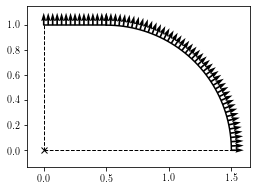

In [2]:
eps = 0.5

rpw_basis_odd_odd = rpw.make_RPW_basis(sym_x = "odd", sym_y = "odd")
rpw_basis_odd_even = rpw.make_RPW_basis(sym_x = "odd", sym_y = "even")
rpw_basis_even_odd = rpw.make_RPW_basis(sym_x = "even", sym_y = "odd")
rpw_basis_even_even = rpw.make_RPW_basis(sym_x = "even", sym_y = "even")

fig = figure(figsize = (4,4))

stadium = st.make_stadium_quarter(eps)
stadium.plot_boundary()
#fb_basis.plot_basis_function(0,1,10)

evp_oo = sp.spectrum(stadium, rpw_basis_odd_odd)
evp_oe = sp.spectrum(stadium, rpw_basis_odd_even)
evp_eo = sp.spectrum(stadium, rpw_basis_even_odd)
evp_ee = sp.spectrum(stadium, rpw_basis_even_even)

wf_oo = wf.wavefunctions(stadium, rpw_basis_odd_odd, sym_x="odd", sym_y ="odd")
wf_oe = wf.wavefunctions(stadium, rpw_basis_odd_even, sym_x="odd", sym_y ="even")
wf_eo = wf.wavefunctions(stadium, rpw_basis_even_odd, sym_x="even", sym_y ="odd")
wf_ee = wf.wavefunctions(stadium, rpw_basis_even_even, sym_x="even", sym_y ="even")


k1= 1.5
k2 = 15

b = 25
delta = 25
M = k2*delta/(2*np.pi)

dk = 0.05
overlap = 0.5
tolerance = 1e-2
spect_oo, ten_oo = evp_oo.compute_spectrum(k1, k2, dk, overlap = overlap, tolerance=tolerance, point_density = M, scale_basis = b, return_tensions = True)
spect_oe, ten_oe = evp_oe.compute_spectrum(k1, k2, dk, overlap = overlap, tolerance=tolerance, point_density = M, scale_basis = b, return_tensions = True)
spect_eo, ten_eo = evp_eo.compute_spectrum(k1, k2, dk, overlap = overlap, tolerance=tolerance, point_density = M, scale_basis = b, return_tensions = True)
spect_ee, ten_ee = evp_ee.compute_spectrum(k1, k2, dk, overlap = overlap, tolerance=tolerance, point_density = M, scale_basis = b, return_tensions = True)


0.2924947738647461 seconds
3.299142360687256 seconds


Text(0.5, 1.0, 'sym : even-even')

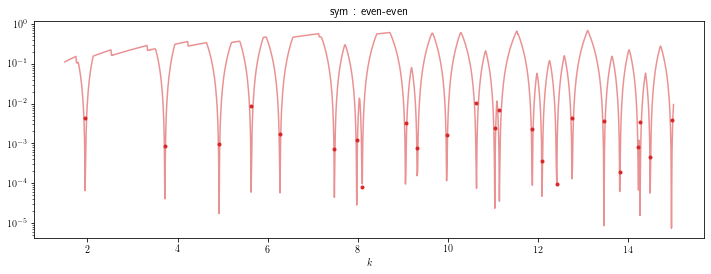

In [5]:
k1= 1.5
k2 = 15
grid = 1200

solver = "DM"
b = 15
delta = 15
M = k2*delta/(2*np.pi)

dk = 0.05
overlap = 0.5
tolerance = 1e-3
evp = evp_ee

fig = figure(figsize = (12,4))

start_time = time.time()
spect_rpw, ten_rpw = evp.compute_spectrum(k1, k2, dk, overlap = overlap, tolerance=tolerance, point_density = M, scale_basis = b, return_tensions = True)
print("%s seconds" % (time.time() - start_time))
#pp = {"marker":".", "linestyle":None, "color":'tab:red', "label":"SM RPW","alpha":1}

start_time = time.time()
pp = {"linestyle":"-" , "color":'tab:red', "label":"DM-FB", "alpha" : 0.5}
ks, ten_dm_rpw = evp.plot_tension(k1, k2, solver = solver, grid = grid, plot_params = pp)
print("%s seconds" % (time.time() - start_time))
semilogy(spect_rpw, ten_rpw, ".", color ='tab:red', label = "SM-FB")
title(r"sym : even-even")


0.582672119140625 seconds
5.515470504760742 seconds


Text(0.5, 1.0, 'sym : odd-even')

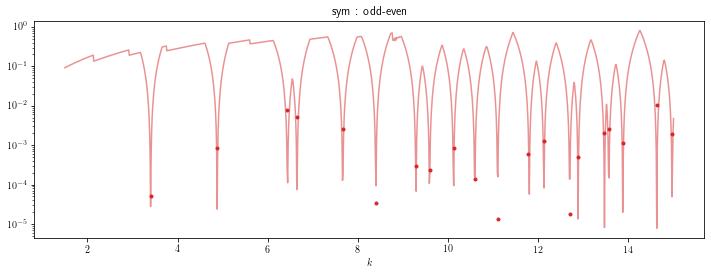

In [8]:
k1= 1.5
k2 = 15
grid = 1200

solver = "DM"
b = 25
delta = 25
M = k2*delta/(2*np.pi)

dk = 0.05
overlap = 0.5
tolerance = 1e-3
evp = evp_oe

fig = figure(figsize = (12,4))

start_time = time.time()
spect_rpw, ten_rpw = evp.compute_spectrum(k1, k2, dk, overlap = overlap, tolerance=tolerance, point_density = M, scale_basis = b, return_tensions = True)
print("%s seconds" % (time.time() - start_time))
#pp = {"marker":".", "linestyle":None, "color":'tab:red', "label":"SM RPW","alpha":1}

start_time = time.time()
pp = {"linestyle":"-" , "color":'tab:red', "label":"DM-FB", "alpha" : 0.5}
ks, ten_dm_rpw = evp.plot_tension(k1, k2, solver = solver, grid = grid, plot_params = pp)
print("%s seconds" % (time.time() - start_time))
semilogy(spect_rpw, ten_rpw, ".", color ='tab:red', label = "SM-FB")
title(r"sym : odd-even")


2.473989486694336 seconds
5.460047006607056 seconds


Text(0.5, 1.0, 'sym : even-odd')

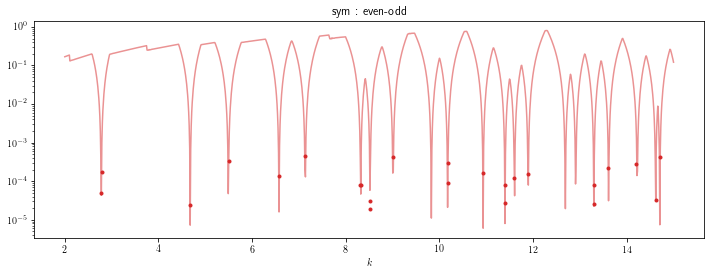

In [16]:
k1= 2
k2 = 15
grid = 1200

solver = "DM"
b = 25
delta = 25
M = k2*delta/(2*np.pi)

dk = 0.01
overlap = 0.5
tolerance = None
evp =  evp_eo

fig = figure(figsize = (12,4))

start_time = time.time()
spect_rpw, ten_rpw = evp.compute_spectrum(k1, k2, dk, overlap = overlap, tolerance=tolerance, point_density = M, scale_basis = b, return_tensions = True)
print("%s seconds" % (time.time() - start_time))
#pp = {"marker":".", "linestyle":None, "color":'tab:red', "label":"SM RPW","alpha":1}

start_time = time.time()
pp = {"linestyle":"-" , "color":'tab:red', "label":"DM-FB", "alpha" : 0.5}
ks, ten_dm_rpw = evp.plot_tension(k1, k2, solver = solver, grid = grid , plot_params = pp)
print("%s seconds" % (time.time() - start_time))
semilogy(spect_rpw, ten_rpw, ".", color ='tab:red', label = "SM-FB")
title(r"sym : even-odd")

0.5499811172485352 seconds
5.438888072967529 seconds


Text(0.5, 1.0, 'sym : odd-odd')

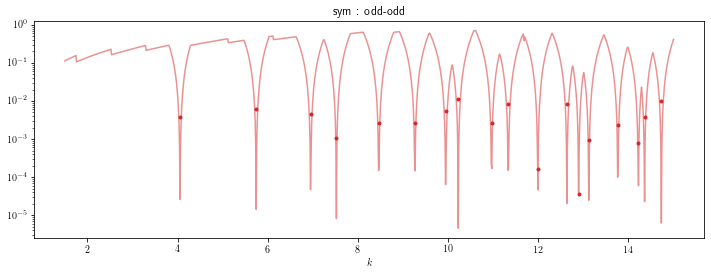

In [17]:
k1= 1.5
k2 = 15
grid = 1200

solver = "DM"
b = 25
delta = 25
M = k2*delta/(2*np.pi)

dk = 0.05
overlap = 0.5
tolerance = 1e-3
evp =  evp_oo

fig = figure(figsize = (12,4))

start_time = time.time()
spect_rpw, ten_rpw =evp.compute_spectrum(k1, k2, dk, overlap = overlap, tolerance=tolerance, point_density = M, scale_basis = b, return_tensions = True)
print("%s seconds" % (time.time() - start_time))
#pp = {"marker":".", "linestyle":None, "color":'tab:red', "label":"SM RPW","alpha":1}

start_time = time.time()
pp = {"linestyle":"-" , "color":'tab:red', "label":"DM-FB", "alpha" : 0.5}
ks, ten_dm_rpw = evp.plot_tension(k1, k2, solver = solver, grid = grid, plot_params = pp)
print("%s seconds" % (time.time() - start_time))
semilogy(spect_rpw, ten_rpw, ".", color ='tab:red', label = "SM-FB")
title(r"sym : odd-odd")

In [4]:
start_time = time.time()
spect_fb_corr, ten_fb_corr = evp_fb.correct_spectrum( spect_fb, tolerance, solver= "DM", point_density = M, scale_basis = b, eps = eps, return_tensions = True)
print("%s seconds" % (time.time() - start_time))

0.3298525810241699 seconds


5.3298139572143555 seconds


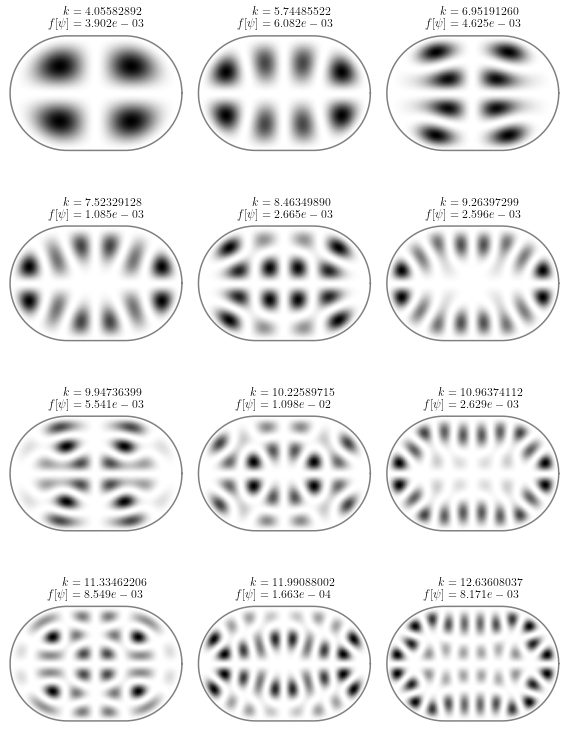

In [18]:
spect, ten = spect_oo, ten_oo
wavef = wf_oo

fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect[i]
    t = ten[i]
    wavef.plot_probability(k, plot_full=True)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()

0.2508046627044678 seconds


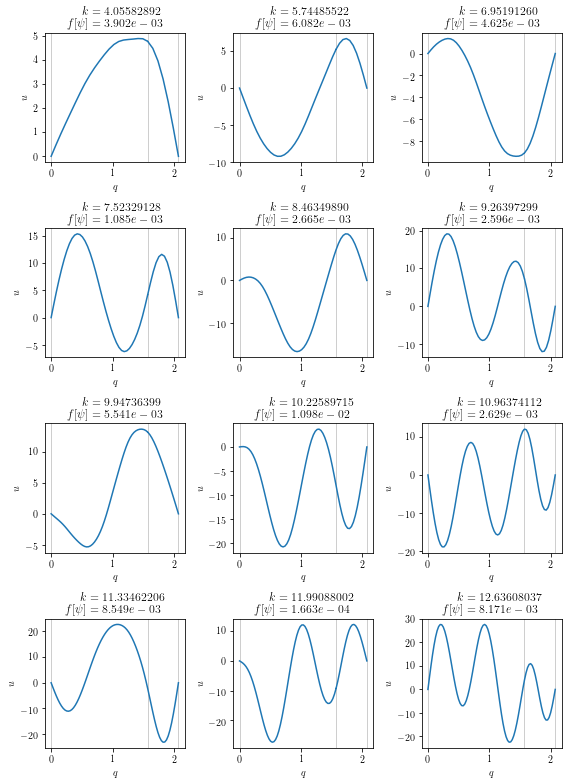

In [7]:
spect, ten = spect_oo, ten_oo
wavef = wf_oo

fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect[i]
    t = ten[i]
    wavef.plot_boundary_function(k, delta=20)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()

0.1759018898010254 seconds


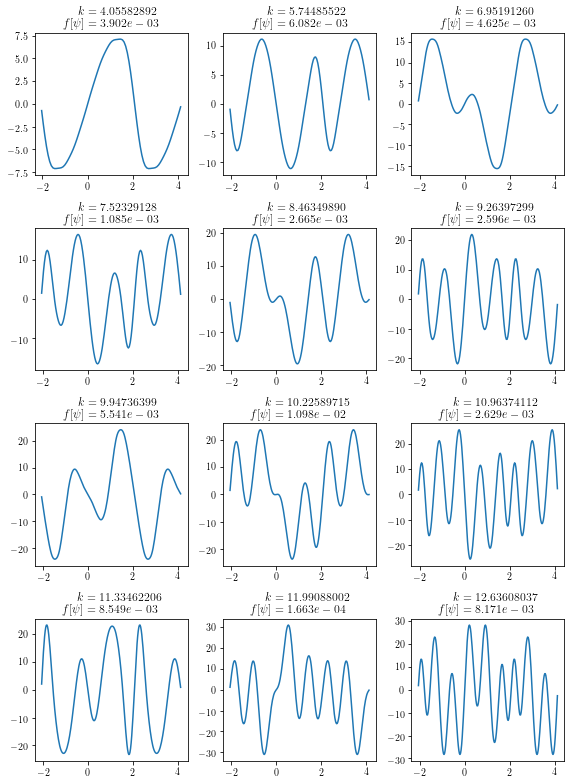

In [8]:
spect, ten = spect_oo, ten_oo
wavef = wf_oo

fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect[i]
    t = ten[i]
    s, u, ds = wavef.u(k, delta = 20)
    #periodize u
    s, u, ds = wavef.continue_u(s, u, ds)
    plot(s,u)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()

0.17824101448059082 seconds


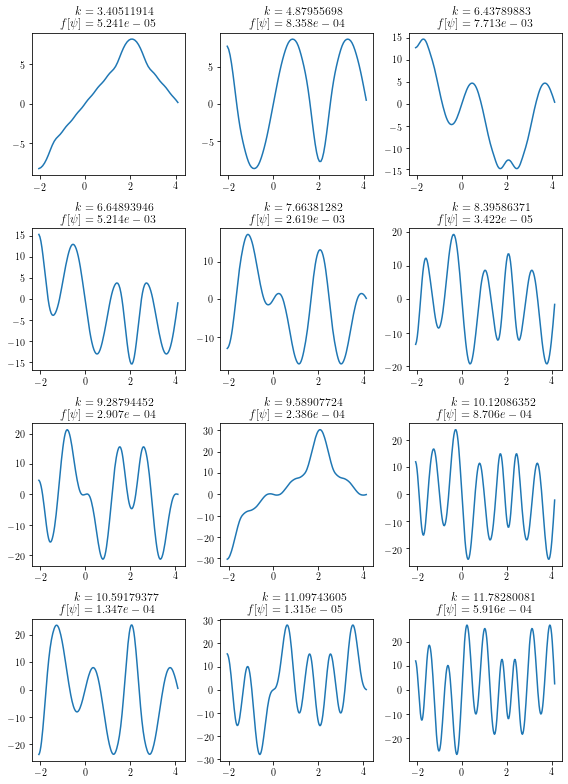

In [4]:
spect, ten = spect_oe, ten_oe
wavef = wf_oe

fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect[i]
    t = ten[i]
    s, u, ds = wavef.u(k, delta = 20)
    #periodize u
    s, u, ds = wavef.continue_u(s, u, ds)
    plot(s,u)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()

0.17356491088867188 seconds


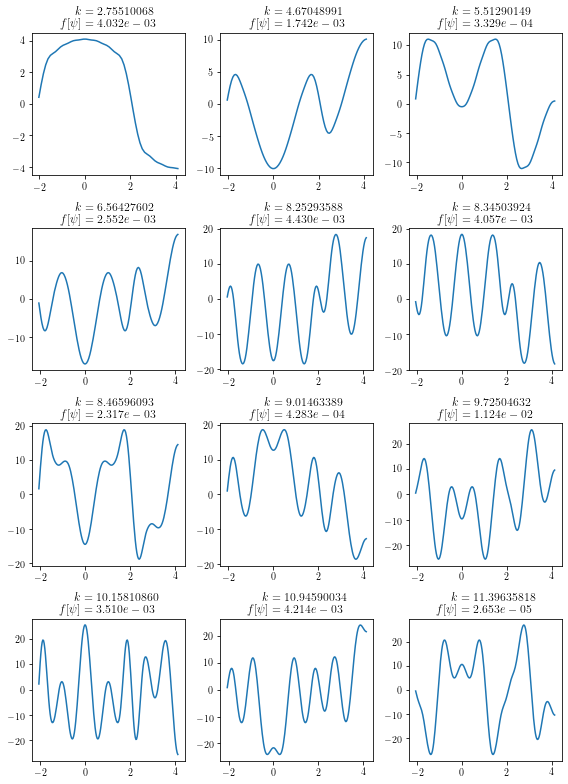

In [5]:
spect, ten = spect_eo, ten_eo
wavef = wf_eo

fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect[i]
    t = ten[i]
    s, u, ds = wavef.u(k, delta = 20)
    #periodize u
    s, u, ds = wavef.continue_u(s, u, ds)
    plot(s,u)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()

0.1637711524963379 seconds


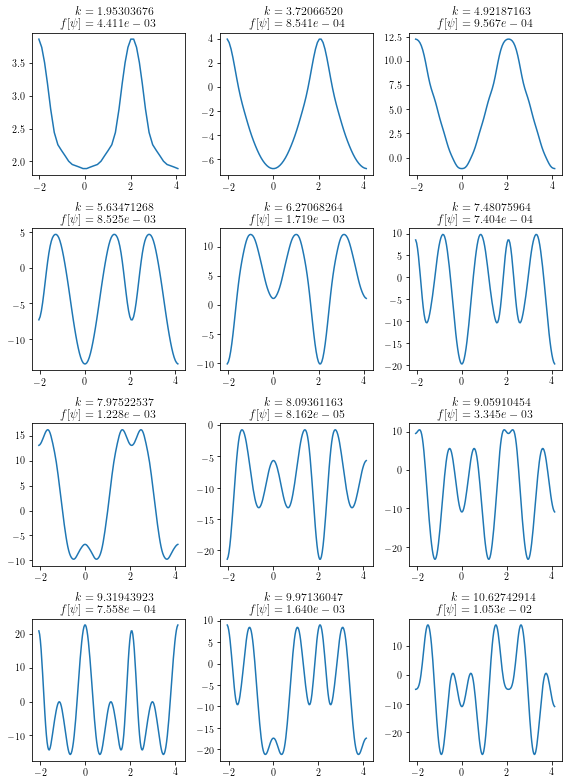

In [6]:
spect, ten = spect_ee, ten_ee
wavef = wf_ee

fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect[i]
    t = ten[i]
    s, u, ds = wavef.u(k, delta = 20)
    #periodize u
    s, u, ds = wavef.continue_u(s, u, ds)
    plot(s,u)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()

32.535202503204346 seconds


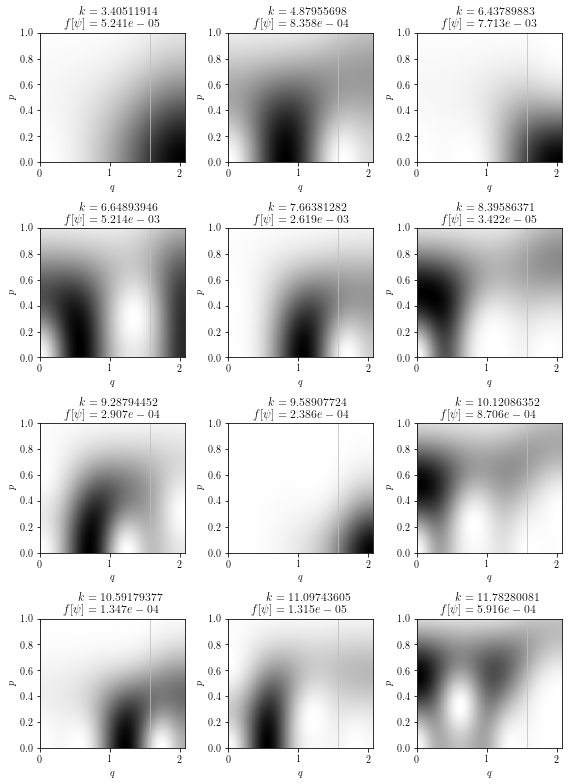

In [8]:
spect, ten = spect_oe, ten_oe
wavef = wf_oe

fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect[i]
    t = ten[i]
    wavef.plot_Husimi_function(k)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()

5.312067747116089 seconds


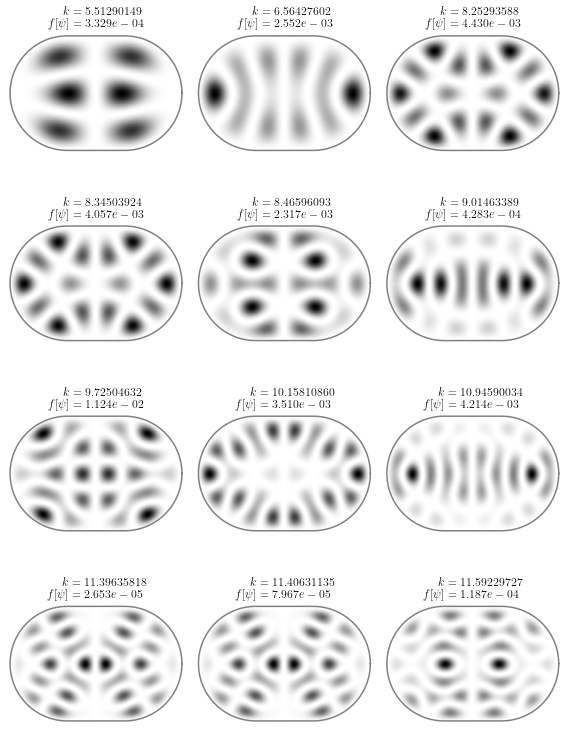

In [3]:
start = 2
spect, ten = spect_eo[start:], ten_eo[start:]
wavef = wf_eo

fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect[i]
    t = ten[i]
    wavef.plot_probability(k, plot_full=True)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()

5.043741464614868 seconds


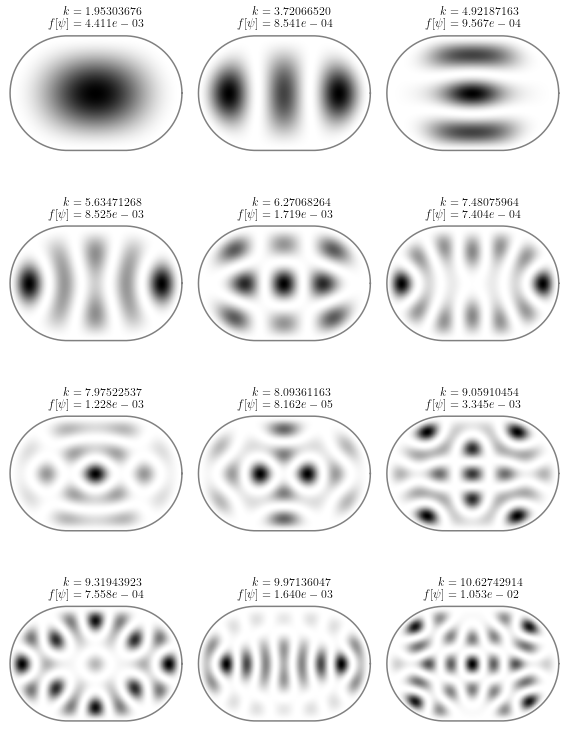

In [23]:
spect, ten = spect_ee, ten_ee
wavef = wf_ee

fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect[i]
    t = ten[i]
    wavef.plot_probability(k, plot_full=True)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()

0.23252105712890625 seconds


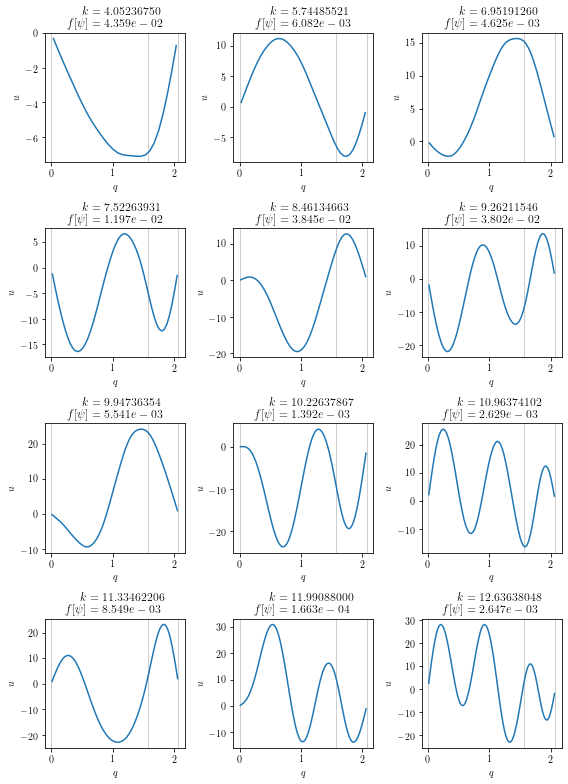

In [10]:
wf_fb = wf.wavefunctions(stadium, fb_basis)

fig = figure(figsize=(8,11))

start_time = time.time()
for i in range(12):
    subplot(4,3,i+1)
    k = spect_fb[i]
    t = ten_fb[i]
    wf_fb.plot_boundary_function(k, delta=20)
    title(r"$k=%.8f$\\"%k + r"$f[\psi]={:.3e}$".format(t))
print("%s seconds" % (time.time() - start_time))
tight_layout()